In [1]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import datetime
print("Setup Complete")

Setup Complete


In [3]:
# Path of the file to read
OctWGS_filepath = "October WGS.csv"

# Read the file
CoVOct = pd.read_csv(OctWGS_filepath, index_col="DOC", parse_dates=True)

In [4]:
# Print the first 5 rows of the data
CoVOct.head()

,Counties,Lineage,Notes
DOC,,,
2023-10-01,Hawaii,FL.1.5.1,Omicron (XBB.1-like)
2023-10-01,Hawaii,FL.1.5.1,Omicron (XBB.1-like)
2023-10-01,Hawaii,EG.5.1.6,Omicron (XBB.1-like)
2023-10-02,Hawaii,FU.1,Omicron (XBB.1.16-like)
2023-10-03,Hawaii,EG.5.1.1,Omicron (XBB.1-like)


In [5]:
#Print the first 5 rows in DOC
CoVOct.index.dtype


dtype('<M8[ns]')

In [6]:
#Count number of variants per lineage in each County
CoVOct[["Lineage","Counties"]].value_counts()

Lineage   Counties
HV.1      Honolulu    70
 HV.1     Honolulu    47
HK.3      Honolulu    31
EG.5.1    Honolulu    19
 JD.1.1   Honolulu    16
                      ..
 HK.2     Honolulu     1
 HK.3     Kauai        1
EG.6.1    Honolulu     1
EG.5.1.6  Kauai        1
 DV.7.1   Honolulu     1
Name: count, Length: 148, dtype: int64

In [13]:
#Remove whitespaces
CoVOct["Lineage_Clean"]=CoVOct["Lineage"].str.strip()
print(CoVOct)

           Counties      Lineage                   Notes  Lineage_Clean
DOC                                                                    
2023-10-01   Hawaii     FL.1.5.1     Omicron (XBB.1-like)      FL.1.5.1
2023-10-01   Hawaii     FL.1.5.1     Omicron (XBB.1-like)      FL.1.5.1
2023-10-01   Hawaii     EG.5.1.6     Omicron (XBB.1-like)      EG.5.1.6
2023-10-02   Hawaii         FU.1  Omicron (XBB.1.16-like)          FU.1
2023-10-03   Hawaii     EG.5.1.1     Omicron (XBB.1-like)      EG.5.1.1
...             ...          ...                      ...           ...
2023-10-26     Maui         HV.1     Omicron (XBB.1-like)          HV.1
2023-10-17     Maui  XBB.1.16.11  Omicron (XBB.1.16-like)   XBB.1.16.11
2023-10-17     Maui       GK.1.1   Omicron (XBB.1.5-like)        GK.1.1
2023-10-30     Maui         HV.1     Omicron (XBB.1-like)          HV.1
2023-10-26     Maui     FL.1.5.1     Omicron (XBB.1-like)      FL.1.5.1

[531 rows x 4 columns]


In [8]:
#Verify removal of spaces in Lineage_Clean column
CoVOct[["Lineage_Clean","Counties"]].value_counts()

Lineage_Clean  Counties
HV.1           Honolulu    117
HK.3           Honolulu     44
EG.5.1.1       Honolulu     30
EG.5.1         Honolulu     26
JD.1.1         Honolulu     19
                          ... 
GS.4.1         Hawaii        1
GS.4           Honolulu      1
GK.2           Hawaii        1
GK.1.4         Honolulu      1
XCH.1          Honolulu      1
Name: count, Length: 117, dtype: int64

<Axes: xlabel='Counties', ylabel='Lineage_Clean'>

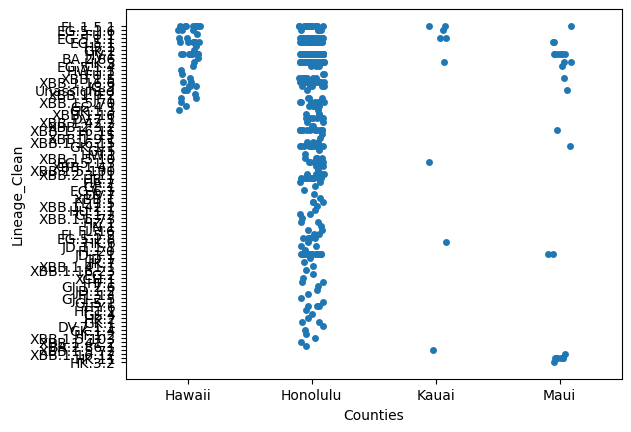

In [9]:
#plot variants in relationship to county
sns.stripplot(x=CoVOct["Counties"],y=CoVOct["Lineage_Clean"])

C:\Users\psobr\AppData\Local\Temp\ipykernel_16172\2385676825.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=CoVOct, x='DOC', hue='Counties', shade=True)


<Axes: xlabel='DOC', ylabel='Density'>

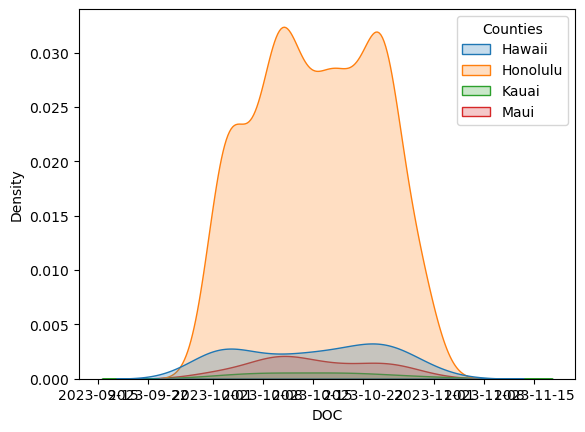

In [10]:
#Distribution of sequences by County
sns.kdeplot(data=CoVOct, x='DOC', hue='Counties', shade=True)